# Machine Learning: Programming Exercise 2


## Logistic Regression
In this exercise, you will implement logistic regression and apply it to two different datasets.

## 1. Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

To begin, run the code below to load the data into Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

In [43]:
# start by loading the data
data = pd.read_csv('ex2data1.txt', header=None, names=[
                   "Exam 1 Score", "Exam 2 Score", "Admitted"])
data.head()

,Exam 1 Score,Exam 2 Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [58]:
m = len(data)

X = np.append(np.array(data["Exam 1 Score"]).reshape((m,1)),np.array(data["Exam 2 Score"]).reshape((m,1)),axis=1)
y = np.array(data["Admitted"]).reshape((m,1))

X[:5], y[:5]

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644]]),
 array([[0],
        [0],
        [0],
        [1],
        [1]]))

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. The code below will load the data and display it on a 2-dimensional plot. You will now complete the code so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

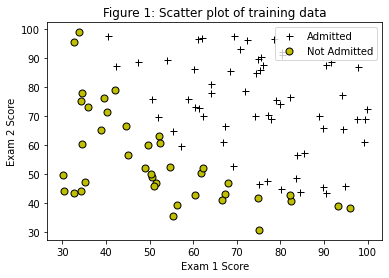

In [11]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos,0],X[pos,1],'k+',linewidth=2,markersize=7,label='Admitted')
plt.plot(X[neg,0],X[neg,1],'ko',markerfacecolor='y',markersize=7,label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='upper right')
plt.title('Figure 1: Scatter plot of training data')
plt.show()

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$
h_{\theta}(x) = g(\theta^Tx),
$$

where function  is the sigmoid function. The sigmoid function is defined as:

$$
g(z) = \frac{1}{1+e^{-z}}
$$

Your first step is to implement this function in sigmoid so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x) in the code section below. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

The sigmoid function, or logistic function, is a function that asymptotes at 0 and 1. The value at 0 is $\frac{1}{2}$.

$$
h_\theta(x) = g(\theta^Tx) = g(z) = \frac{1}{1+ e^{-z}} = \frac{1}{1+ e^{-\theta^Tx}}
$$

A plot of the sigmoid function: sigmoid

![sigmoid](https://github.com/rickwierenga/CS229-Python/raw/8c899e94c7bdf60031ce0b80402285820ce1cb44/ex2/notes/sigmoid.png)

We are going to use the sigmoid function to predict how likely it is that a given data point is in category 0. Our hypothesis:

$$
h_\theta(x) = P(y = 0|x;\theta)
$$

Because there are only two categories (in this case), we can derrive that:

$$
P(y = 0|x;\theta) + P(y = 1|x;\theta)= 1
$$

**Exercise:** Implement the sigmoid function in Python.

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
# TEST CASE
sigmoid(0)

0.5

#### 1.2.2 Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction to return the cost and gradient. Recall that the cost function in logistic regression is

$$
J(\theta) =\frac{1}{m}\sum_{i=1}^m\left[
-y^{(i)} \log(h_{\theta}(x^{(i)}))- (1 -y^{(i)}) \log(1- h_{\theta}(x^{(i)}))\right]
$$

Assume our hypothesis for an example is wrong, the higher probability $h_\theta$ had predicted, the higher the penatly.
A vectorized implementation of the cost function:

$$
J(\theta) = \frac{1}{m} ⋅(−y^T \log(h)−(1−y)^T \log(1−h))
$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $J$th element (for $j = 0,\; 1,\ldots, n$) is defined as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}
$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_{\theta}(x)$. Once you are done, run the code sections below to set up your data and call your costFunction using two sets of initial values of $\theta$.

Vectorized:

$$
\frac{\delta}{\delta\theta_J} = \frac{1}{m} \cdot X^T \cdot (g(X\cdot\theta)-\vec{y})
$$

##### Initialize the data

In [59]:
# Setup the data matrix appropriately
m, n = X.shape

# Add intercept term to X
X = np.append(np.ones((m,1)),X,axis=1)

# Initialize the fitting parameters
# initial_theta = np.zeros((n + 1, 1))
initial_theta = np.zeros(n + 1) # to be able to use scipy optimize, theta must be shape (n,)


In [70]:
sigmoid(X @ initial_theta)


array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

##### Compute the gradient

You should see that the cost is about 0.693 and gradients of about -0.1000,  -12.0092, and -11.2628 for all-zero $\theta$, and that the cost is 0.219 with gradients of 0.043, 2.566, 2.640 for non-zero $\theta$.

**Exercise:** Write a function to compute the gradient.

In [61]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    J = 1/m * (-y.T @ np.log(h) - (1-y).T @ np.log(1-h))
    grad = 1/m * X.T @ (h - y.reshape(m))

    return J, grad

In [62]:
# TEST CASE
cost, grad = cost_function(initial_theta, X, y)

print('Cost: \n{}\n'.format(cost))
print('Gradient: \n{}'.format(grad))
grad.shape


Cost: 
[0.69314718]

Gradient: 
[ -0.1        -12.00921659 -11.26284221]


(3,)

In [64]:
test_theta = np.array([[-24],[0.2],[0.2]]).reshape(3)
t_cost, t_grad = cost_function(test_theta, X, y)

print('Cost: \n{}\n'.format(t_cost))
print('Gradient: \n{}'.format(t_grad))


Cost: 
[0.21833019]

Gradient: 
[0.04290299 2.56623412 2.64679737]


#### 1.2.3 Learning parameters using conjugate gradient

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use a MATLAB built-in function called `fminunc`.

`fminunc` is an optimization solver that finds the minimum of an unconstrained* function. For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters. Concretely, you are going to use `fminunc` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of $X$ and $y$ values). You will pass to fminunc the following inputs:

- The initial values of the parameters we are trying to optimize.
- A function that, when given the training set and a particular $\theta$ computes the logistic regression cost and gradient with respect to $\theta$ for the dataset $(X,y)$

**Constraints in optimization often refer to constraints on the parameters, for example, constraints that bound the possible values $\theta$ can take (e.g. $\theta < 1$). Logistic regression does not have such constraints since $\theta$ is allowed to take any real value.*

But in Python, the optimization library we are going to use is `scipy.optimize`. We have to provide the algorithm with our cost function, initial guess, gradient among with some other (optional) configuration options.

Please scan [the docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) of minimize first.

In [65]:
# Original cost_function returns the cost and gradient, but we want to use scipy's minimize function, so we need to write a wrapper function.

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    J = 1/m * (-y.T @ np.log(h) - (1-y).T @ np.log(1-h))
    return J


def compute_gradient(theta, X, y):
    m = len(y)
    n = len(theta)
    h = sigmoid(X @ theta)
    grad = 1/m * X.T @ (h - y.reshape(m))
    return grad.reshape((n,))


In [66]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=initial_theta,
                      fprime=compute_gradient, args=(X, y))
result


  NIT   NF   F                       GTG
    0    1  6.931471805599452E-01   2.71082898E+02
    1    3  6.318123602631416E-01   7.89087138E-01
    2    5  5.892425214503384E-01   7.39226671E+01
    3    7  4.227823902747544E-01   1.85265650E+01
    4    9  4.072926903020122E-01   1.68671144E+01
    5   11  3.818854748677483E-01   1.07735086E+01
    6   13  3.786234690559758E-01   2.31584962E+01
tnc: stepmx = 1000
    7   16  2.389267693103166E-01   3.00821519E+00
    8   18  2.047203877575086E-01   1.52227298E-01
    9   20  2.046713887589159E-01   6.62494295E-02
   10   22  2.035303163564867E-01   9.30778910E-04
tnc: fscale = 32.7776
   11   24  2.035293522492246E-01   8.07225207E-06
   12   26  2.035251114859156E-01   1.80211289E-04
   13   28  2.034984103418146E-01   5.02842173E-04
   14   30  2.034978377380883E-01   9.88323635E-06
   15   32  2.034977904590652E-01   3.76655473E-06
   16   34  2.034977386541594E-01   1.94004524E-05
   17   36  2.034977015894746E-01   2.31615588E-13


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [71]:
from scipy.optimize import minimize

result = minimize(compute_cost, initial_theta, args=(X, y.reshape(m)),
                  method='CG', jac=compute_gradient,
                  options={"maxiter": 400, "disp": 1})
theta = result.x
print('Conjugate gradient found the following values for theta: {}'.format(theta))


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 51
         Function evaluations: 120
         Gradient evaluations: 120
Conjugate gradient found the following values for theta: [-25.16318502   0.20624648   0.20148659]


/var/folders/qs/q9lqdz8j2612q3_2jy1sdbrc0000gn/T/ipykernel_55614/57588806.py:6: RuntimeWarning: divide by zero encountered in log
  J = 1/m * (-y.T @ np.log(h) - (1-y).T @ np.log(1-h))
/var/folders/qs/q9lqdz8j2612q3_2jy1sdbrc0000gn/T/ipykernel_55614/57588806.py:6: RuntimeWarning: invalid value encountered in matmul
  J = 1/m * (-y.T @ np.log(h) - (1-y).T @ np.log(1-h))


##### The decision boundary

The decision boundary is a line (in case of a 2d plane) that seperates the area where we predict $y=1$ and $y=0$.

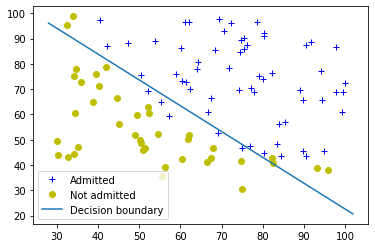

In [72]:
# Find indices of positive and negative examples
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()

# Plot the decision boundary
plot_x = np.array([min(X[:, 1])-2,  max(X[:, 1])+2])
plot_y = (-1./theta[2]) * ((theta[1] * (plot_x) + theta[0]))

plt.plot(plot_x, plot_y, label='Decision boundary')

# Legend, specific for the exercise
plt.legend()


#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776. Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in `predict`. The predict function will produce '1' or '0' predictions given a dataset and a learned parameter vector $\theta$.

After you have completed the code in predict.m, the code below will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct. 

In [3]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print(
    'For a student with scores 45 and 85, we predict an admission probability of {:.2}'.format(prob))


NameError: name 'theta' is not defined

##### Accuracy

t's often a good idea to see how well your model trained. You can do that by checking how much datapoints we can predict correctly using . In a real world application, you should consider splitting your data (eg 80% - 20%) and test on data the model has not seen before. This gives you more realistic insight in how your model would perform in the real world - and that's your ultimate goal ;)

In this example, we expect a training accuracy of 89.0%.

In [74]:
# Compute accuracy on our training set
p = np.zeros((m, 1))
for (i, example) in enumerate(X):
    prob = sigmoid(np.array(example.dot(theta)))
    if prob >= 0.5:
        p[i] = 1
    else:
        p[i] = 0
print('Training Accuracy: {}%'.format(np.mean(p == y.reshape((m, 1))) * 100))


Training Accuracy: 89.0%


## 2. Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data

Similar to the previous parts of this exercise, `plotData` is used in the code below to generate a figure like Figure 3, where the axes are the two test scores, and the positive ( $y=1$, accepted) and negative ( $y=0$, rejected) examples are shown with different markers. 

In [3]:
# start by loading the data
data = pd.read_csv('ex2data2.txt', header=None, names=[
                   "Microchip Test 1", "Microchip Test 2", "Accepted"])
data.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
m = len(data)

X = np.append(np.array(data["Microchip Test 1"]).reshape(
    (m, 1)), np.array(data["Microchip Test 2"]).reshape((m, 1)), axis=1)
y = np.array(data["Accepted"]).reshape((m, 1))

print(X.shape, y.shape)
X[:5], y[:5]


(118, 2) (118, 1)


(array([[ 0.051267,  0.69956 ],
        [-0.092742,  0.68494 ],
        [-0.21371 ,  0.69225 ],
        [-0.375   ,  0.50219 ],
        [-0.51325 ,  0.46564 ]]),
 array([[1],
        [1],
        [1],
        [1],
        [1]]))

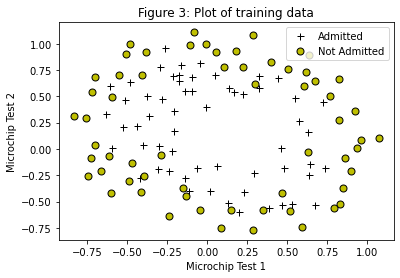

In [7]:
# Find indices of positive and negative examples
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

# Plot examples
plt.plot(X[pos, 0], X[pos, 1], 'k+', linewidth=2,
         markersize=7, label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'ko', markerfacecolor='y',
         markersize=7, label='Not Admitted')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.title('Figure 3: Plot of training data')
plt.show()

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `mapFeature`, we will map the features into all polynomial terms of $x1$ and $x2$ up to the sixth power.

$$
mapFeature(x) = \begin{bmatrix} 1 \newline
                x_1 \newline
                x_2 \newline
                x_1^2 \newline
                x_1 x_2 \newline
                x_2^2 \newline
                x_1^3 \newline
                \vdots \newline
                x_1 x_2^5 \newline
                x_2^6 \newline
                \end{bmatrix}
$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. 

Run the code below to map the features.

In [5]:
def mapFeature(X1, X2, degree):
# MAPFEATURE Feature mapping function to polynomial features
#
#   MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of
#   X1, X2, X1. ^ 2, X2. ^ 2, X1*X2, X1*X2. ^ 2, etc..
#
#   Inputs X1, X2 must be the same size
#
    if not type(X1) == np.ndarray:
        X1 = np.array([X1])

    if not type(X2) == np.ndarray:
        X2 = np.array([X2])

    assert X1.shape == X2.shape

    out = np.ones((len(X1), 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            new = (X1 ** (i - j) * (X2 ** j)).reshape(len(X1), 1)
            out = np.hstack((out, new))
    
    return out

In [6]:
# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
X = mapFeature(X[:,0], X[:,1], degree=6)
m, n = X.shape
print(X.shape)

(118, 28)


While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

### 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in `costFunctionReg` to return the cost and gradient. Recall that the regularized cost function in logistic regression is

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \large[ - y^{(i)}\ \log (h_\theta (x^{(i)})) - (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
$$

Note that you should not regularize the parameter $\theta_0$. In Python, recall that indexing starts from 1, hence, you should not be regularizing the theta(1) parameter (which corresponds to $\theta_0$) in the code. The gradient of the cost function is a vector where the  element is defined as follows:

$$
\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m \left ( h_\theta(x^{(i)}) - y^{(i)} \right ) x^{(i)}_j \qquad \text{for } j = 0, \newline
\frac{\partial J(\theta)}{\partial \theta_j} = \left ( \frac{1}{m}\sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)} ) x^{(i)}_j \right ) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \geq 1,
\end{align*}
$$

Once you are done, run the code below to call your `costFunctionReg` function using the initial value of $\theta$ (initialized to all zeros). You should see that the cost is about 0.693 for all-zero $\theta$ and 3.16 for the non-zero $\theta$ test case.

Gradient descent, just like the cost function, is slightly modified for regularization.

For $\theta_j$ where $j=0$:
$$
\theta_j := \theta_j -\alpha \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)}){x_0}^{(i)}\end{bmatrix}
$$
For $\theta_j$ where $j \in \{1, 2, ..., n\}$:
$$
\theta_j := \theta_j -\alpha \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}{\theta_j} \end{bmatrix}
$$
**Note that we don't penalize our bias vector $X_1$**.

In [8]:
def costFunctionReg(theta, X, y, _lambda):
    m = len(y)
    h = sigmoid(X @ theta)
    reg = (_lambda/(2*m)) * (theta[1:].T @ theta[1:])
    J = 1/m * (-y.T @ np.log(h) - (1-y).T @ np.log(1-h)) + reg
    
    grad_reg = _lambda/m * theta
    grad_reg[0] = 0
    grad = 1/m * X.T @ (h - y.reshape(m,1)) + grad_reg

    return J, grad

In [7]:
# Original cost_function returns the cost and gradient, but we want to use scipy's minimize function, so we need to write a wrapper function.

def compute_regularized_cost(theta, X, y, _lambda):
    m,n = X.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    h = sigmoid(X @ theta)
    reg = (_lambda/(2*m)) * (theta[1:].T @ theta[1:])
    J = 1/m * (-y.T @ np.log(h) - (1-y).T @ np.log(1-h)) + reg
    return J

def compute_regularized_gradient(theta, X, y, _lambda):
    m, n = X.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    h = sigmoid(X @ theta)
    reg = _lambda/m * theta
    reg[0] = 0
    grad = 1/m * X.T @ (h - y.reshape(m, 1)) + reg
    return grad.reshape((n,))

In [24]:
# Initialize fitting parameters
m, n = X.shape
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1
_lambda = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, y, _lambda)
print('Cost at initial theta (zeros): {}' .format(cost))
print(
    'Gradient at initial theta (zeros) - first five values only: {}'.format(grad[0:5]))


Cost at initial theta (zeros): [[0.69314718]]
Gradient at initial theta (zeros) - first five values only: [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


**Exercise:** Implement compute_regularized_gradient.

In [12]:
test_theta = np.ones((n, 1))

t_cost, t_grad = costFunctionReg(test_theta, X, y, 10)

print('Cost at initial theta (zeros): {}'.format(t_cost))
print(
    'Gradient at initial theta (zeros) - first five values only: \n{}'.format(t_grad[:5]))


Cost at initial theta (zeros): [[3.16450933]]
Gradient at initial theta (zeros) - first five values only: 
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


#### 2.3.1 Learning parameters using fminunc

Similar to the previous parts, the next step is to use fminunc to learn the optimal parameters. If you have completed the cost and gradient for regularized logistic regression (`costFunctionReg`) correctly, you should be able to run the code in the following sections to learn the parameters using fminunc for multiple values of $\lambda$.

In [10]:
from scipy.optimize import minimize

initial_theta = np.ones(n)
_lambda = 1
result = minimize(compute_regularized_cost, initial_theta, args=(X, y, _lambda),
                  method='CG', jac=compute_regularized_gradient,
                  options={"maxiter": 400, "disp": 1})
theta = result.x
print(
    'Conjugate gradient found the following values for theta - first five values only: {}'.format(theta[:5]))


Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 28
         Function evaluations: 76
         Gradient evaluations: 76
Conjugate gradient found the following values for theta - first five values only: [ 1.27278161  0.62533884  1.18105652 -2.02009622 -0.91762258]


### Plotting the decision boundary

To help you visualize the model learned by this classifier, we have provided the function `plotDecisionBoundary` which plots the (nonlinear) decision boundary that separates the positive and negative examples. In `plotDecisionBoundary`, we plot the nonlinear decision boundary by computing the classifier's predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from $y=0$ to $y=1$. After learning the parameters, the code in the next section will plot a decision boundary similar to Figure 4.

We can plot a more complex decision boundary using `np.linspace` and `contour`.

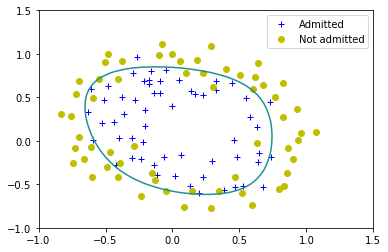

In [16]:
# Find indices of positive and negative examples
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()

# Here is the grid range
u = np.linspace(-1, 1.5, 50).reshape(50)
v = np.linspace(-1, 1.5, 50).reshape(50)
z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = mapFeature(u[i], v[j], degree=6).dot(theta)

# Plot z = 0
# Notice you need to specify the range [0, 0]
#z = z.reshape(len(u), len(v))
plt.contour(u, v, z.T, 0)


## Exploring regularization

As mentioned before, $\lambda$ is used to control the problem of overfitting. In the following graphs, models trained with different values of lambda are shown to give you some intuition on the problem of over/underfitting.

In [11]:
def create_plot_for_lambda(X, y, _lambda):
    from scipy.optimize import minimize
    result = minimize(compute_regularized_cost, initial_theta, args=(X, y, _lambda),
                      method='CG', jac=compute_regularized_gradient,
                      options={"maxiter": 400, "disp": 1})
    theta = result.x
    print(
        'Conjugate gradient found the following values for theta - first five values only: {}'.format(theta[:5]))

    # Find indices of positive and negative examples
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    # Plot examples
    plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
    plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
    plt.legend()

    # Here is the grid range
    u = np.linspace(-1, 1.5, 50).reshape(50)
    v = np.linspace(-1, 1.5, 50).reshape(50)
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = mapFeature(u[i], v[j], degree=6).dot(theta)

    # Plot z = 0
    # Notice you need to specify the range [0, 0]
    #z = z.reshape(len(u), len(v))
    plt.contour(u, v, z.T, 0)


### Overfitting

Remember: overfitting means the model probably only works on the training set and not well in the real world. If you model is overfit, consider adding regularization or choosing a higher value for $\lambda$.

You can check out other values of $\lambda$ yourself.

         Current function value: 0.278667
         Iterations: 400
         Function evaluations: 1446
         Gradient evaluations: 1446
Conjugate gradient found the following values for theta - first five values only: [ 2.25892333 -2.22391391  0.9968203  -8.09416038 -7.61978502]


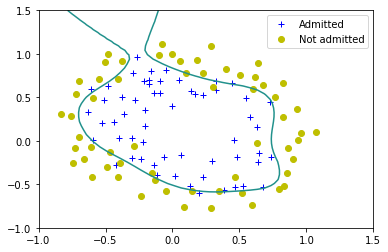

In [21]:
create_plot_for_lambda(X, y, 0)

### Underfitting

Underfitting means the model is not well trained. Having a high $\lambda$ can cause underfitting.

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
Conjugate gradient found the following values for theta - first five values only: [ 0.326144   -0.00815789  0.16580133 -0.44666092 -0.11177511]


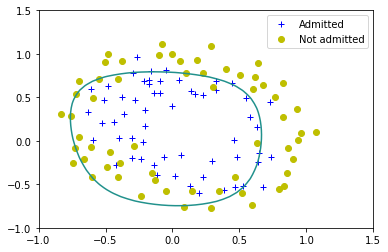

In [19]:
create_plot_for_lambda(X, y, 10)

### Underfitting^2

This is what model trained with an extremely high value of $\lambda$ looks like:

Optimization terminated successfully.
         Current function value: 0.687913
         Iterations: 10
         Function evaluations: 22
         Gradient evaluations: 22
Conjugate gradient found the following values for theta - first five values only: [[ 0.00980668 -0.01412537  0.00377853 -0.042739   -0.01022205 -0.03014124
  -0.01463056 -0.00604095 -0.00696047 -0.01809063 -0.03371293 -0.00186483
  -0.01097168 -0.00272976 -0.03239042 -0.01649585 -0.00367154 -0.00281145
  -0.00492208 -0.00389909 -0.02514883 -0.02655998 -0.00086207 -0.00544171
  -0.00031198 -0.00619701 -0.00121111 -0.03215613]]


ValueError: shapes (1,28) and (1,28) not aligned: 28 (dim 1) != 1 (dim 0)

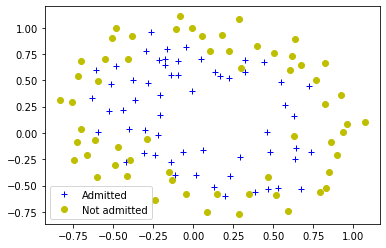

In [12]:
create_plot_for_lambda(X, y, 130)

## Adjusted normal equation

As you would have expected, the normal equation changes when you add normalization to your machine learning model. The adjusted version of the normal equation:

$$
\theta=(X^TX+\lambda\begin{bmatrix} 0&\dotsi&\dotsi&\dotsi &0\\\vdots &1&0& 0 & \vdots&\\\vdots&0&1 &0 & \vdots\\\vdots&0&0&1&\vdots\\0&\dotsi&\dotsi&\dotsi&1 \end{bmatrix})^{-1}X^Ty
$$

If $m < n$, $X$ is non-invertable.

In [13]:
L = np.eye(n)

L[0] = 0

_lambda = 1

theta = np.linalg.inv(X.T @ X + _lambda * L)@X.T@y
theta


array([[ 0.94416708],
       [ 0.2315894 ],
       [ 0.41142826],
       [-0.7380916 ],
       [-0.50116657],
       [-0.69193639],
       [ 0.1003575 ],
       [-0.10718673],
       [-0.06667559],
       [-0.05556887],
       [-0.45471969],
       [ 0.09321721],
       [-0.23956536],
       [-0.07088082],
       [-0.40279421],
       [ 0.04618662],
       [-0.01432296],
       [ 0.04153635],
       [-0.10356044],
       [-0.02654812],
       [ 0.05619122],
       [-0.18296629],
       [ 0.12363998],
       [-0.11445861],
       [ 0.06788982],
       [-0.10602358],
       [ 0.04149463],
       [-0.05781815]])